In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df.job_posted_date=pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x )


In [4]:
df_analyst = df[df['job_title_short'] == 'Data Analyst']
df_analyst.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}


In [5]:
df_explode = df_analyst.explode('job_skills')
df_explode.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."


In [16]:
df_stats = df_explode.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')
)
df_stats = df_stats.sort_values('skill_count', ascending=False).head(10)
df_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


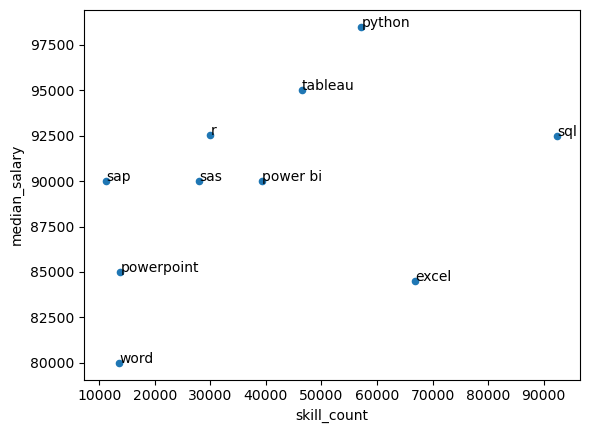

In [26]:
df_stats.plot(kind='scatter',x='skill_count',y='median_salary')

# seaborn is easier and used more commonly. So use seaborn instead of the following version.
for i, txt in enumerate(df_stats.index):
    plt.text(df_stats['skill_count'].iloc[i],df_stats['median_salary'].iloc[i],txt)